# Multi-Layer Perceptron (MLP) Model

In this notebook, a MLP model is trained for the Human Activity Recognition dataset. While it is expected to do well as a neural network, it might perform worse than CNN due to its relative simplicity.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix

In [4]:
columns = [('feature' + str(i)) for i in range(1, 561 + 1)]

In [5]:
def get_dataset(X_path, y_path):
    X = pd.read_csv(X_path, sep=' ')
    y = pd.read_csv(y_path, squeeze=True)
    X.columns = columns
    return X, y

In [6]:
X_train = np.loadtxt('HAPT Data Set/Train/X_train.txt')
y_train = np.loadtxt('HAPT Data Set/Train/y_train.txt').astype(int)


In [7]:
X_test = np.loadtxt('HAPT Data Set/Test/X_test.txt')
y_test = np.loadtxt('HAPT Data Set/Test/y_test.txt').astype(int)

In [8]:
print(X_train.shape)

(7767, 561)


In [9]:
print(X_test.shape)

(3162, 561)


Here we initialise and train the MLP classifier. We are using the MLPClassifier from sklearn. A random state is set to ensure reproducible results, and the maximum number of iterations (threshold) is set to 300.

In [10]:
clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=1)

Now, we use the trained classifier to predict the labels for the test dataset.

In [11]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [12]:
print("Accuracy of MLP on original dataset: {}".format(accuracy))

Accuracy of MLP on original dataset: 0.9399114484503479


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.99      0.96       496
           2       0.95      0.93      0.94       471
           3       0.98      0.96      0.97       420
           4       0.97      0.89      0.93       508
           5       0.90      0.97      0.93       556
           6       1.00      0.99      0.99       545
           7       0.76      0.70      0.73        23
           8       0.82      0.90      0.86        10
           9       0.61      0.69      0.65        32
          10       0.74      0.80      0.77        25
          11       0.62      0.65      0.63        49
          12       0.76      0.59      0.67        27

    accuracy                           0.94      3162
   macro avg       0.84      0.84      0.84      3162
weighted avg       0.94      0.94      0.94      3162



From the classification report, we can make a few observations.  
1. The data is imbalanced. Classes 1-6 have far more data points compared to classes 7-12.
2. The minority classes generally perform more poorly compared to the majority classes. This can be seen by their low F1 scores.

To understand the data better, we also viewed the outputs using a confusion matrix. To ensure that the colours are meaningful, the data is normalized by row (i.e. true label). Hence the numbers represent the probability of predicting the column index given that the true label is the row index.

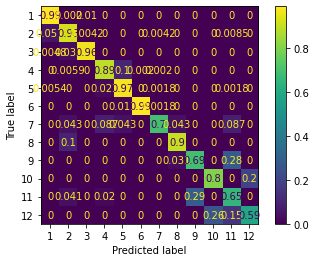

In [16]:
#print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test, normalize='true')
plt.show()

From the confusion matrix, we see that the (9,11) and (11,9) entries as well as the (10,12) and (12,10) entries achieve a higher probability than their adjacent non-diagonal neighbours. This indicates that class 9 (SIT_TO_LIE) is often misclassified as class 11 (STAND_TO_LIE), and similarly class 10 (LIE_TO_SIT) is often misclassified as class 12 (LIE_TO_STAND). Comparing these classes with the remaining 8 classes, this makes sense as the 2 pairs of actions are very similar to each other. Hence it would be hard for our model to distinguish one action from another.

Finally, we look at the distribution of data among the 12 classes to see how imbalanced they are.

<AxesSubplot:>

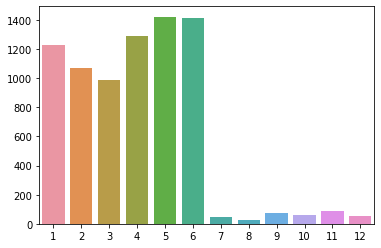

In [17]:
values, counts = np.unique(y_train, return_counts=True)
sns.barplot(x=values,y=counts)

<AxesSubplot:>

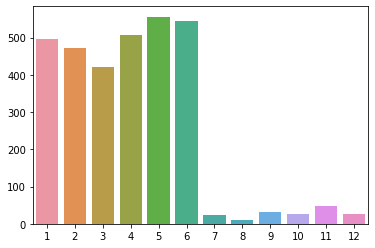

In [18]:
values, counts = np.unique(y_test, return_counts=True)
sns.barplot(x=values,y=counts)

# Resampling

To deal with the imbalanced nature of this dataset, SMOTE will be performed to balanced out the data. Specifically, after SMOTE-ing, all classes will have the same number of instances as the one with the most originally.

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
smote = SMOTE()

In [21]:
X_train_smoted, y_train_smoted = smote.fit_resample(X_train, y_train)

In [22]:
clf.fit(X_train_smoted, y_train_smoted)

MLPClassifier(max_iter=300, random_state=1)

In [23]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [24]:
print("Accuracy of MLP on SMOTE dataset: {}".format(accuracy))

Accuracy of MLP on SMOTE dataset: 0.9411764705882353


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.99      0.95       496
           2       0.97      0.90      0.93       471
           3       0.98      0.97      0.98       420
           4       0.95      0.92      0.93       508
           5       0.92      0.95      0.94       556
           6       1.00      0.99      0.99       545
           7       0.82      0.78      0.80        23
           8       0.83      1.00      0.91        10
           9       0.62      0.66      0.64        32
          10       0.73      0.76      0.75        25
          11       0.63      0.69      0.66        49
          12       0.74      0.63      0.68        27

    accuracy                           0.94      3162
   macro avg       0.84      0.85      0.85      3162
weighted avg       0.94      0.94      0.94      3162



Looking at the accuracy after applying SMOTE, we see that there is only a slight improvement in accuracy of 0.00127. However, looking at the classification report, we see significant changes in the F1 scores of the minority classes. For example,
- the F1 score of class 7 (STAND_TO_SIT) improved from 0.73 to 0.80
- the F1 score of class 8 (SIT_TO_STAND) improved from 0.86 to 0.91
- the F1 score of class 11 (STAND_TO_LIE) improved from 0.63 to 0.66

For the remaining minority classes, there was no significant change in the F1 score. The accuracy probably only improved slightly because the number of data points in the minority classes is too low to affect the accuracy significantly.

In [26]:
print(confusion_matrix(y_test, y_pred))

[[490   1   5   0   0   0   0   0   0   0   0   0]
 [ 36 425   3   0   0   0   2   0   0   0   5   0]
 [  3   9 408   0   0   0   0   0   0   0   0   0]
 [  0   4   0 467  36   1   0   0   0   0   0   0]
 [  2   0   0  22 530   0   1   0   0   0   1   0]
 [  0   0   0   0   7 537   1   0   0   0   0   0]
 [  0   0   0   2   1   0  18   1   0   0   1   0]
 [  0   0   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0   0   1  21   0   9   1]
 [  0   0   0   0   0   0   0   0   0  19   1   5]
 [  0   0   0   1   0   0   0   0  13   1  34   0]
 [  0   1   0   0   0   0   0   0   0   6   3  17]]


# Dimensionality Reduction
Among 561 features given in the dataset, there must be some unnecessary attributes. To improve the model's running time, LDA will be used to perform dimensionality reduction

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [28]:
model = LinearDiscriminantAnalysis(n_components=10)

In [29]:
model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=10)

To analyse the significance of features extracted by LDA, we compared the coefficients (weights) of the model. A higher absolute value of the coefficient was interpreted as greater importance for the corresponding feature. This could be done because the features were already scaled in the train and test dataset provided, making the coefficients comparable.  

Here we obtain the top 3 features for each class. The outputs are the indices of the input features in the features.txt file.

In [30]:
# Analysing the significance of features using weights (coefficients)
coefficients = model.coef_
intercept = model.intercept_
for coef in coefficients.tolist():
    abs_coef = list(map(abs, coef))
    max_coefs = sorted(abs_coef, reverse=True)[:3]
    print(list(map(lambda max_coef: abs_coef.index(max_coef), max_coefs)))

[96, 98, 232]
[98, 96, 97]
[98, 96, 418]
[98, 96, 97]
[98, 96, 97]
[96, 98, 232]
[98, 95, 97]
[98, 232, 418]
[97, 96, 43]
[96, 232, 98]
[97, 96, 4]
[96, 232, 98]


We see that features 96, 97 and 98 are the top features identified by LDA. Looking at the features.txt file, we find that:  
- Class 96: tBodyAccJerk-SMA-1             
- Class 97: tBodyAccJerk-Energy-1          
- Class 98: tBodyAccJerk-Energy-2

All 3 features come from the same jerk signal (tBodyAccJerk), except that different functions were applied (SMA - signal magnitude area, Energy) over different axes (1 - x-axis, 2 - y-axis). Having tBodyAccJerk as the most important signal makes sense as it is the derivative of body acceleration with respect to time. The 3 different classes of actions, namely dynamic, static and postural transitions, all have different values of jerk. Hence this feature can most accurately distinguish the classes.

In [31]:
steps = [('lda', LinearDiscriminantAnalysis(n_components=10)), ('mlp', clf)]
model = Pipeline(steps=steps)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [32]:
print("Accuracy of MLP on LDA-transformed dataset: {}".format(accuracy))

Accuracy of MLP on LDA-transformed dataset: 0.9465528146742568


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98       496
           2       0.97      0.96      0.97       471
           3       1.00      0.97      0.98       420
           4       0.94      0.88      0.91       508
           5       0.90      0.96      0.93       556
           6       1.00      1.00      1.00       545
           7       0.83      0.83      0.83        23
           8       0.91      1.00      0.95        10
           9       0.63      0.84      0.72        32
          10       0.52      0.56      0.54        25
          11       0.82      0.67      0.74        49
          12       0.46      0.44      0.45        27

    accuracy                           0.95      3162
   macro avg       0.83      0.84      0.83      3162
weighted avg       0.95      0.95      0.95      3162



From the accuracy, we see a more significant improvement of 0.00665 compared to the baseline. The F1 scores have also significantly improved for most minority classes. In particular,
- Class 7 (STAND_TO_SIT) improved from 0.73 to 0.83
- Class 8 (SIT_TO_STAND) improved from 0.86 to 0.95
- Class 9 (SIT_TO_LIE) improved from 0.65 to 0.72
- Class 11 (STAND_TO_LIE) improved from 0.63 to 0.74

However, we also note a significant drop of F1 scores for classes 10 (LIE_TO_SIT) and 12 (LIE_TO_STAND), from 0.77 to 0.54 and 0.67 to 0.45 respectively. We can take a look at the confusion matrix to gain more insights.

In [34]:
print(confusion_matrix(y_test, y_pred))

[[494   2   0   0   0   0   0   0   0   0   0   0]
 [ 15 454   0   0   0   0   1   1   0   0   0   0]
 [  2  11 407   0   0   0   0   0   0   0   0   0]
 [  0   0   0 447  57   0   1   0   2   0   0   1]
 [  0   0   0  23 533   0   0   0   0   0   0   0]
 [  0   0   0   0   0 543   0   0   0   0   0   2]
 [  0   0   0   2   0   0  19   0   2   0   0   0]
 [  0   0   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0   0   0  27   0   5   0]
 [  0   0   0   0   0   0   1   0   0  14   0  10]
 [  0   0   0   2   0   0   1   0  12   0  33   1]
 [  0   0   0   0   0   0   0   0   0  13   2  12]]


From the confusion matrix, we see that almost half of class 10 is misclassified as class 12 and vice versa. A plausible explanation for this is that LDA removed certain features that were essential to distinguishing class 10 from class 12 and vice versa. 

# PCA
Instead of using LDA, PCA will be adopted for dimensionality reduction.

In [35]:
from sklearn.decomposition import PCA

In [36]:
steps = [('pca', PCA(n_components=10)), ('mlp', clf)]
model = Pipeline(steps=steps)

In [37]:
model.fit(X_train, y_train)

C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('pca', PCA(n_components=10)),
                ('mlp', MLPClassifier(max_iter=300, random_state=1))])

In [38]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [39]:
print("Accuracy of MLP on PCA-transformed dataset: {}".format(accuracy))

Accuracy of MLP on PCA-transformed dataset: 0.8564199873497786


10 components setup gives a bad performance with a 8% decrease in accuracy. Instead of fixing the number of components, iterate through a few values to find ones that give the best performance.

In [40]:
for i in range(10, 31):
    steps = [('pca', PCA(n_components=i)), ('mlp', clf)]
    model = Pipeline(steps=steps)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of MLP on PCA-transformed dataset with {} components: {}".format(i, accuracy))

C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP on PCA-transformed dataset with 10 components: 0.8573687539531942


C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP on PCA-transformed dataset with 11 components: 0.864326375711575


C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP on PCA-transformed dataset with 12 components: 0.8614800759013282


C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP on PCA-transformed dataset with 13 components: 0.8747628083491461


C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP on PCA-transformed dataset with 14 components: 0.8662239089184061


C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP on PCA-transformed dataset with 15 components: 0.8570524984187223


C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP on PCA-transformed dataset with 16 components: 0.8595825426944972


C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP on PCA-transformed dataset with 17 components: 0.8655913978494624


C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP on PCA-transformed dataset with 18 components: 0.8636938646426312


C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP on PCA-transformed dataset with 19 components: 0.8690702087286527


C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP on PCA-transformed dataset with 20 components: 0.8763440860215054


C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP on PCA-transformed dataset with 21 components: 0.8779253636938646


C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP on PCA-transformed dataset with 22 components: 0.8681214421252372


C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP on PCA-transformed dataset with 23 components: 0.8886780518659076


C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP on PCA-transformed dataset with 24 components: 0.8801391524351676


C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP on PCA-transformed dataset with 25 components: 0.8855154965211891


C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP on PCA-transformed dataset with 26 components: 0.8940543959519291


C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP on PCA-transformed dataset with 27 components: 0.8975332068311196


C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP on PCA-transformed dataset with 28 components: 0.8962681846932321


C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP on PCA-transformed dataset with 29 components: 0.8959519291587603
Accuracy of MLP on PCA-transformed dataset with 30 components: 0.8905755850727388


C:\Users\Benedict\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


We see that none of the accuracies exceed 0.9, which means that PCA decreases the performance of the model. We conclude that PCA is less able to identify good features compared to LDA.